# MNSHS - Topic modeling methods comparison against LLM

## 0- Import

In [1]:
import matplotlib.pyplot as plt
from math import exp
import re

## 1- Lecture des données

In [2]:
scenarios = !ls ../output
print(scenarios)

['all_files', 'scenario_0', 'scenario_slides', 'scenario_texts']


In [3]:
scoresPerScenario = []

for scenario in scenarios:
    methodPaths = !ls ../output/$scenario/evaluations
    
    scoresPerMethod = []
    
    for methodPath in methodPaths:
        f = open("../output/" + scenario + "/evaluations/" + methodPath, "r")
        score = float(f.readline().split(";")[1])
        f.close()
        
        caracs = methodPath.split(".")[0].split("+")
        caracs[-1], coherence = caracs[-1].split("_")[0], "_".join(caracs[-1].split("_")[1:])
        caracs.append(coherence)
        
        scoresPerMethod.append((caracs, score))
    
    scoresPerScenario.append((scenario, scoresPerMethod))

In [4]:
# Example
name, scoresPerMethod = scoresPerScenario[0]
print(name)
print(scoresPerMethod[0])

all_files
(['Raw', 'Babelfy', 'CREA', 'c_v'], 0.38672336477268776)


In [5]:
# Liste des méthodes
_, scoresPerMethod = scoresPerScenario[0]
for carac,_ in scoresPerMethod:
    print(carac)

['Raw', 'Babelfy', 'CREA', 'c_v']
['Raw', 'Babelfy', 'CREA', 'u_mass']
['Raw', 'Babelfy', 'LDA', 'c_v']
['Raw', 'Babelfy', 'LDA', 'u_mass']
['Raw', 'LDA', 'c_v']
['Raw', 'LDA', 'u_mass']
['Raw', 'RNNTagger', 'Babelfy', 'CREA', 'c_v']
['Raw', 'RNNTagger', 'Babelfy', 'CREA', 'u_mass']
['Raw', 'RNNTagger', 'Babelfy', 'LDA', 'c_v']
['Raw', 'RNNTagger', 'Babelfy', 'LDA', 'u_mass']
['Raw', 'RNNTagger', 'LDA', 'c_v']
['Raw', 'RNNTagger', 'LDA', 'u_mass']
['Raw', 'TreeTagger', 'Babelfy', 'CREA', 'c_v']
['Raw', 'TreeTagger', 'Babelfy', 'CREA', 'u_mass']
['Raw', 'TreeTagger', 'Babelfy', 'LDA', 'c_v']
['Raw', 'TreeTagger', 'Babelfy', 'LDA', 'u_mass']
['Raw', 'TreeTagger', 'LDA', 'c_v']
['Raw', 'TreeTagger', 'LDA', 'u_mass']


## 2- Visualisation

In [6]:
def visualizeVS(name, vals1, vals2, caracs):
    plt.figure(figsize=(15, 6))

    bar_width = 0.35

    index = range(len(caracs))
    index_set1 = [i - bar_width/2 for i in index]
    index_set2 = [i + bar_width/2 for i in index]
    
    bars_set1 = plt.bar(index_set1, vals1, bar_width, label='LDA', color='orange')
    bars_set2 = plt.bar(index_set2, vals2, bar_width, label='CREA', color='purple')

    for bar, val in zip(bars_set1, vals1):
        if val < 0.2:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{val:.2f}', ha='center', va='bottom', color='black')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{val:.2f}', ha='center', va='bottom', color='white')

    for bar, val in zip(bars_set2, vals2):
        if val > 0 and val < 0.2:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{val:.2f}', ha='center', va='bottom', color='black')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{val:.2f}', ha='center', va='bottom', color='white')

    plt.title(name)
    plt.xlabel('')
    plt.ylabel('Scores')
    
    plt.legend()
    plt.xticks(index, caracs)
    
    name = re.sub(r'\W+', '_', name)
    plt.savefig(name + ".png")

    plt.show()

In [7]:
def visualize(name, vals, caracs, color):    
    plt.figure(figsize=(15, 6))

    bars = plt.bar(caracs, vals, color=color)

    for bar, val in zip(bars, vals):
        if val > 0 and val < 0.2:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{val:.2f}', ha='center', va='bottom', color='black')
        elif val < 0:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{val:.2f}', ha='center', va='bottom', color='white')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{val:.2f}', ha='center', va='bottom', color='white')

    plt.title(name)
    plt.xlabel('')
    plt.ylabel('Scores')
    
    name = re.sub(r'\W+', '_', name)
    plt.savefig(name + ".png")

    plt.show()

### 2-1- LDA vs CREA

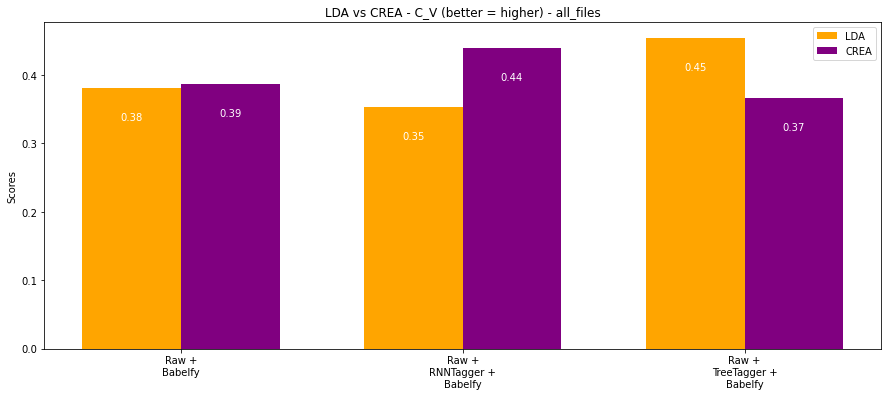

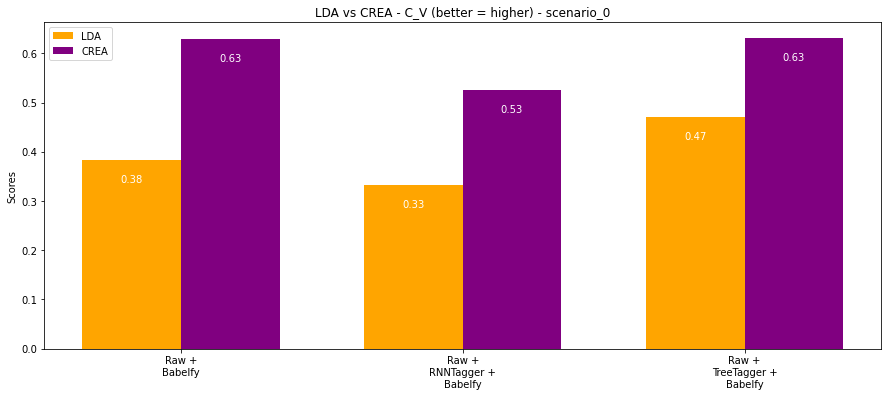

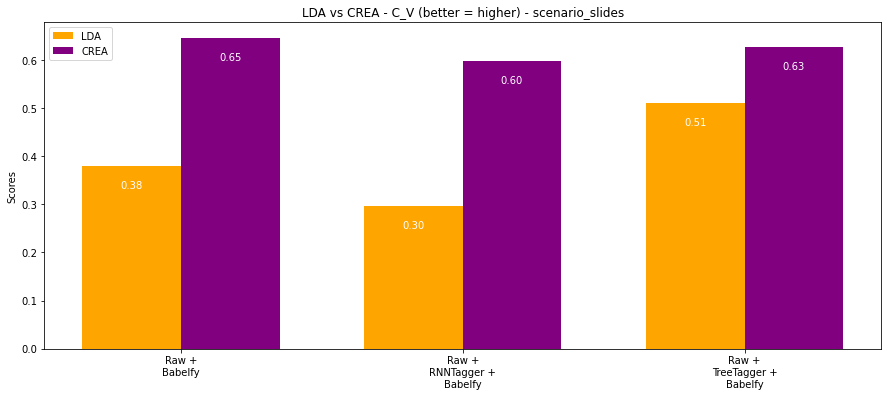

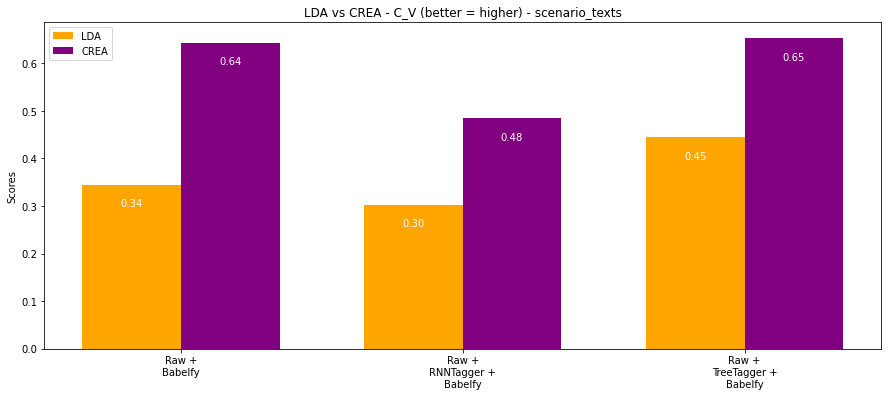

In [8]:
for name, scoresPerMethod in scoresPerScenario:
    LDA = []
    CREA = []
    
    for caracs, score in scoresPerMethod:
        if 'u_mass' in caracs:
            continue
        if 'CREA' in caracs:
            CREA.append((caracs, score))
        if 'Babelfy' in caracs and 'LDA' in caracs:
            LDA.append((caracs, score))
    
    LABELS = [" +\n".join(labels[:-2]) for labels,_ in LDA]
    LDA = [score for _,score in LDA]
    CREA = [score for _,score in CREA]

    name = "LDA vs CREA - C_V (better = higher) - " + name
    
    visualizeVS(name, LDA, CREA, LABELS)

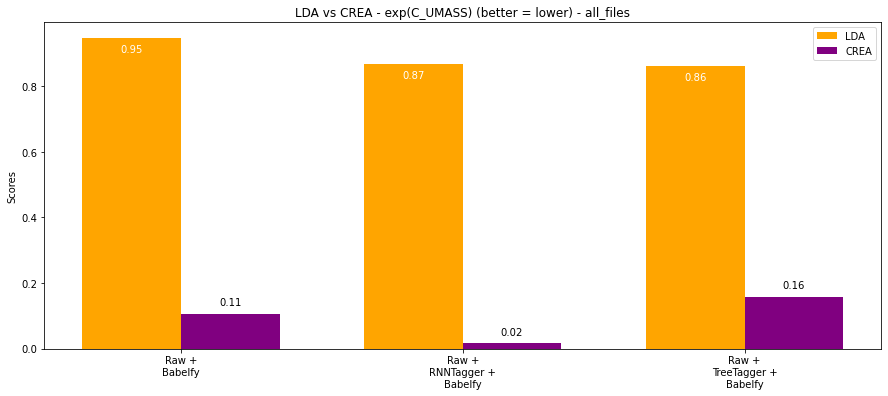

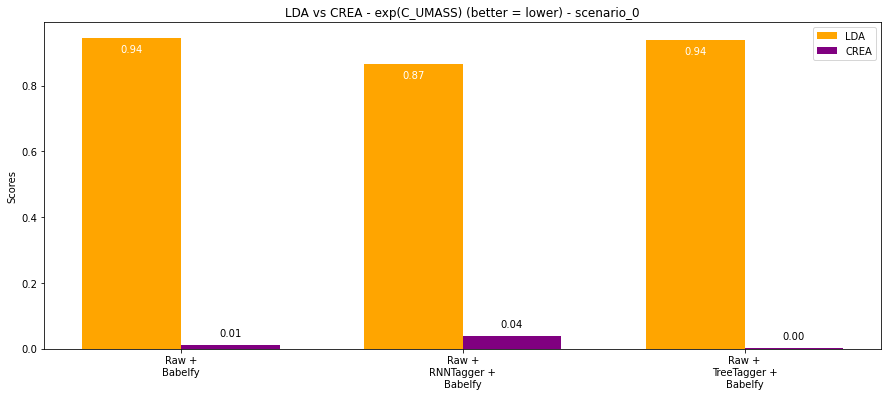

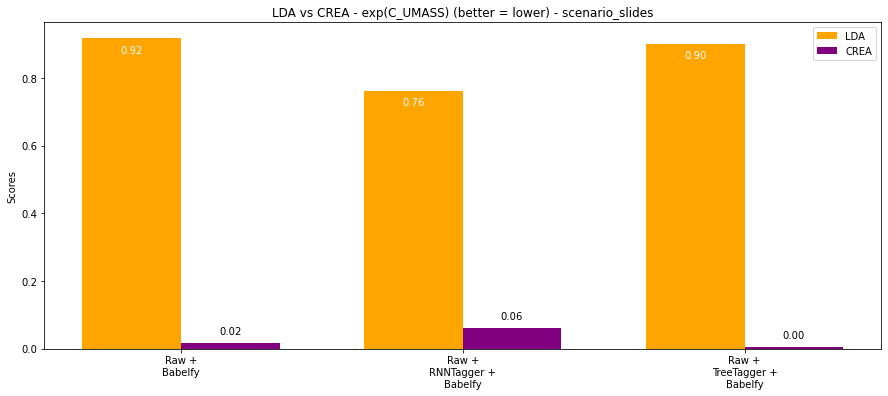

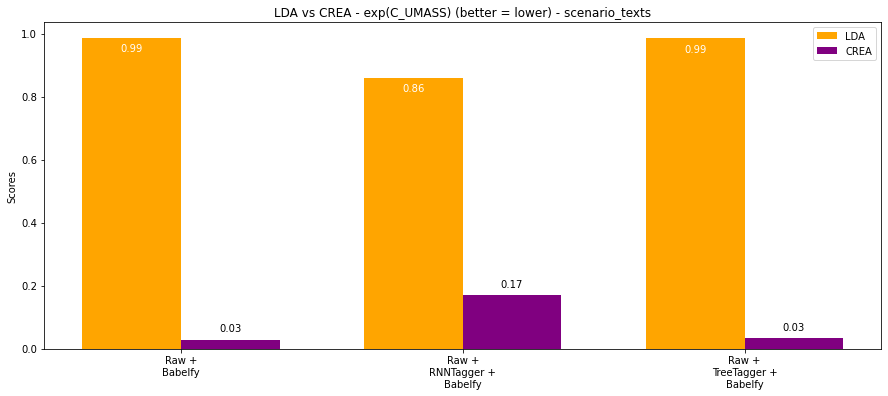

In [9]:
for name, scoresPerMethod in scoresPerScenario:
    LDA = []
    CREA = []
    
    for caracs, score in scoresPerMethod:
        if 'c_v' in caracs:
            continue
        if 'CREA' in caracs:
            CREA.append((caracs, score))
        if 'Babelfy' in caracs and 'LDA' in caracs:
            LDA.append((caracs, score))
    
    LABELS = [" +\n".join(labels[:-2]) for labels,_ in LDA]
    LDA = [exp(score) for _,score in LDA]
    CREA = [exp(score) for _,score in CREA]

    name = "LDA vs CREA - exp(C_UMASS) (better = lower) - " + name

    visualizeVS(name, LDA, CREA, LABELS)

### 2-2- LDA pre-processing

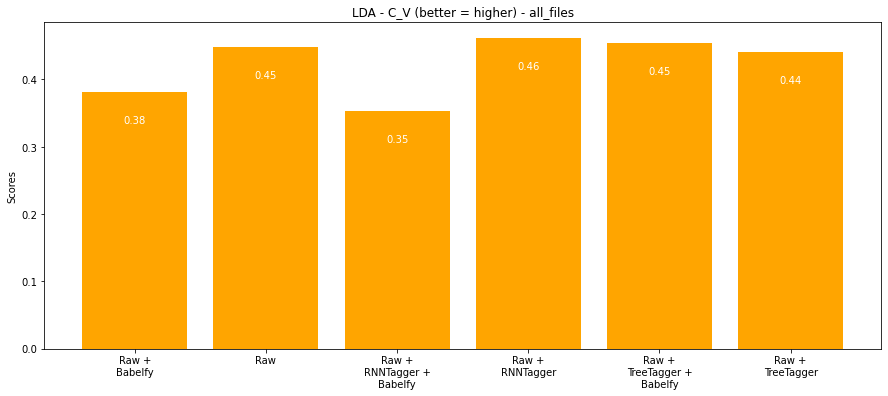

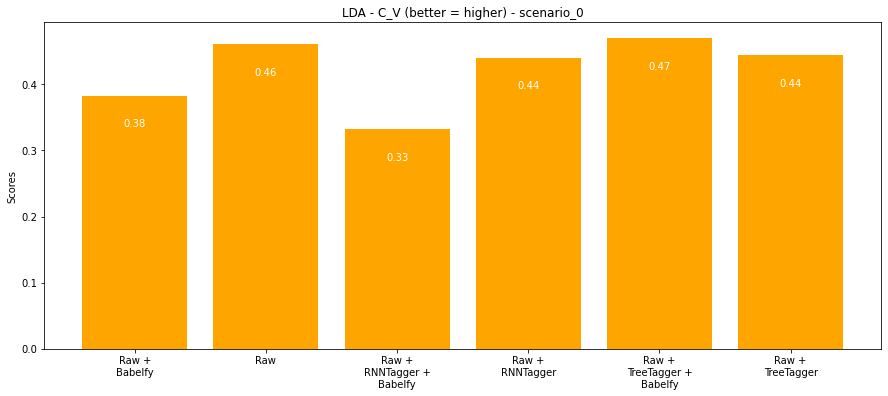

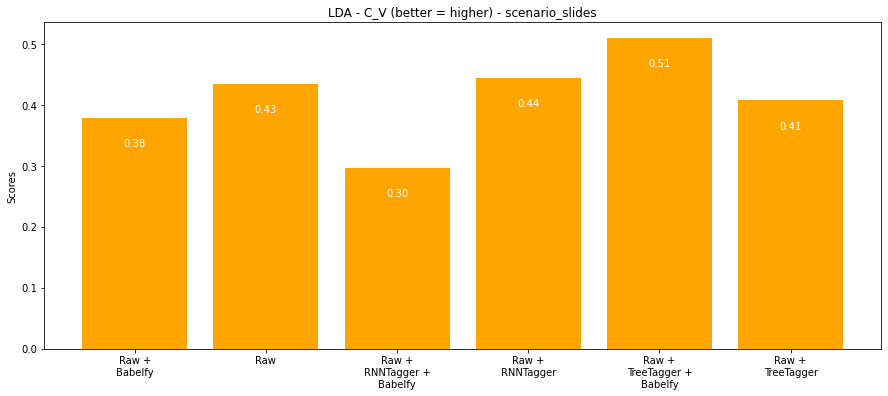

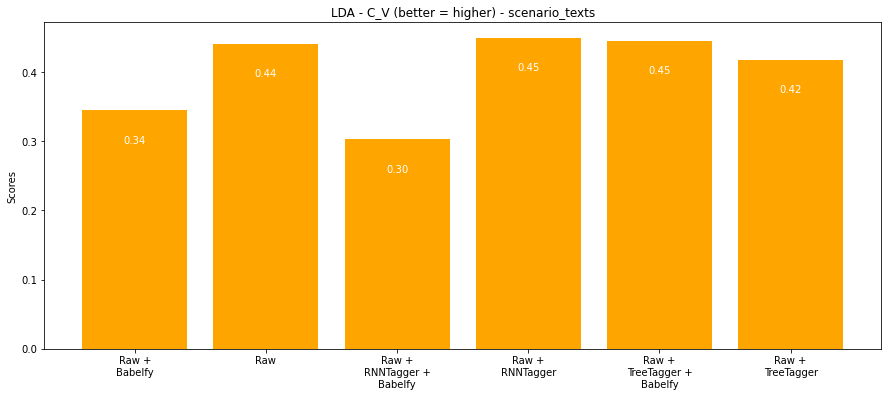

In [10]:
for name, scoresPerMethod in scoresPerScenario:
    LDA = []
    
    for caracs, score in scoresPerMethod:
        if 'u_mass' in caracs:
            continue
        if 'CREA' in caracs:
            continue
        LDA.append((caracs, score))
    
    LABELS = [" +\n".join(labels[:-2]) for labels,_ in LDA]
    LDA = [score for _,score in LDA]

    name = "LDA - C_V (better = higher) - " + name

    visualize(name, LDA, LABELS, "orange")

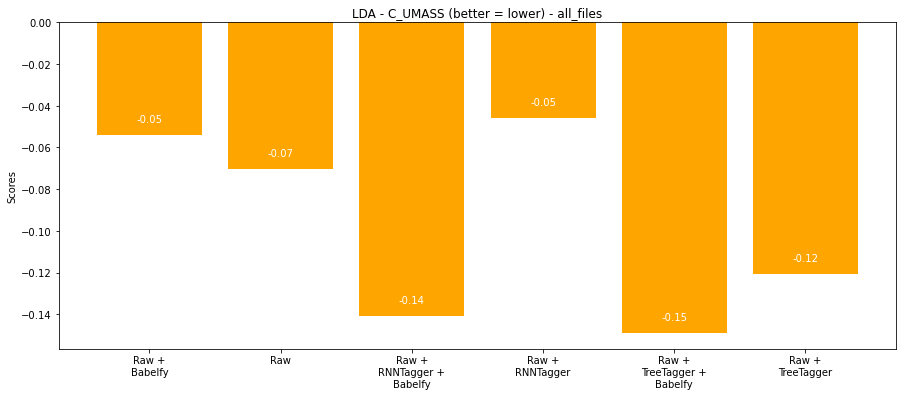

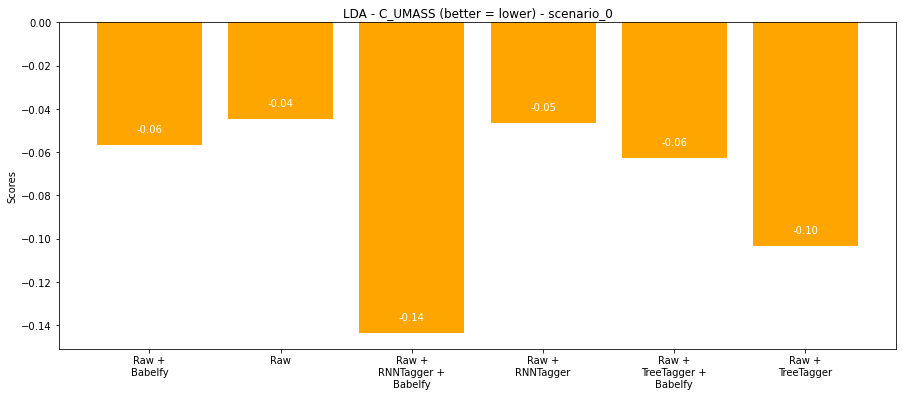

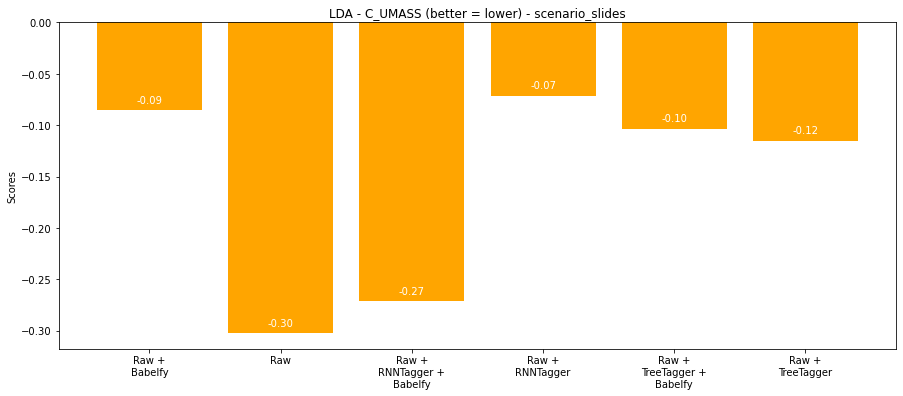

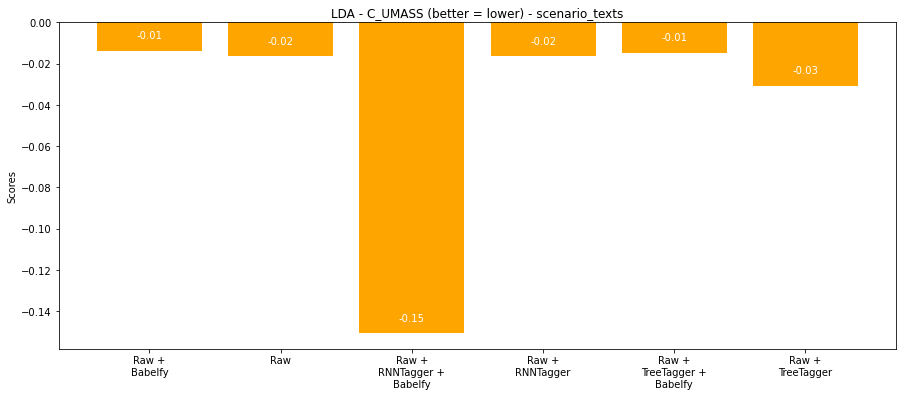

In [11]:
for name, scoresPerMethod in scoresPerScenario:
    LDA = []
    
    for caracs, score in scoresPerMethod:
        if 'c_v' in caracs:
            continue
        if 'CREA' in caracs:
            continue
        LDA.append((caracs, score))
    
    LABELS = [" +\n".join(labels[:-2]) for labels,_ in LDA]
    LDA = [score for _,score in LDA]

    name = "LDA - C_UMASS (better = lower) - " + name

    visualize(name, LDA, LABELS, "orange")

### 2-3- CREA pre-processing

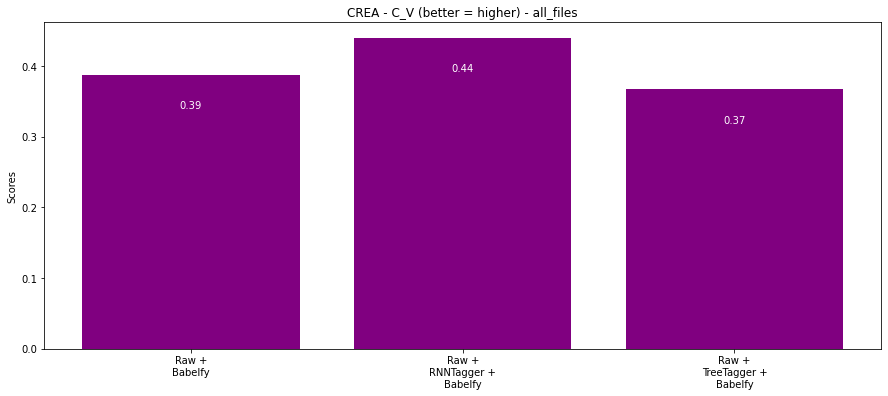

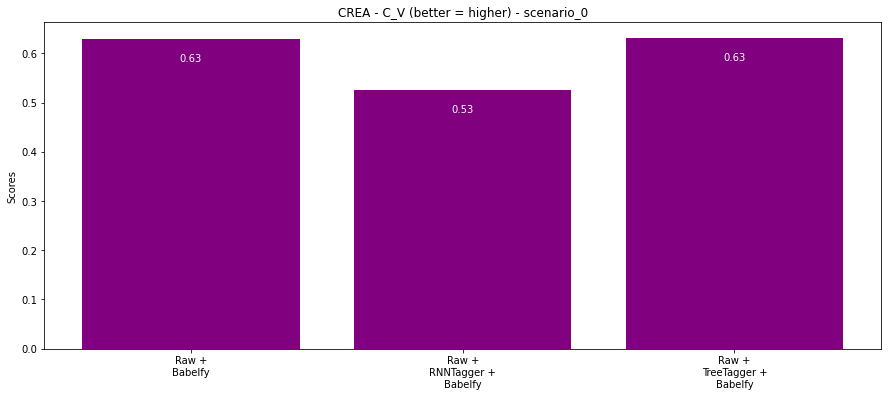

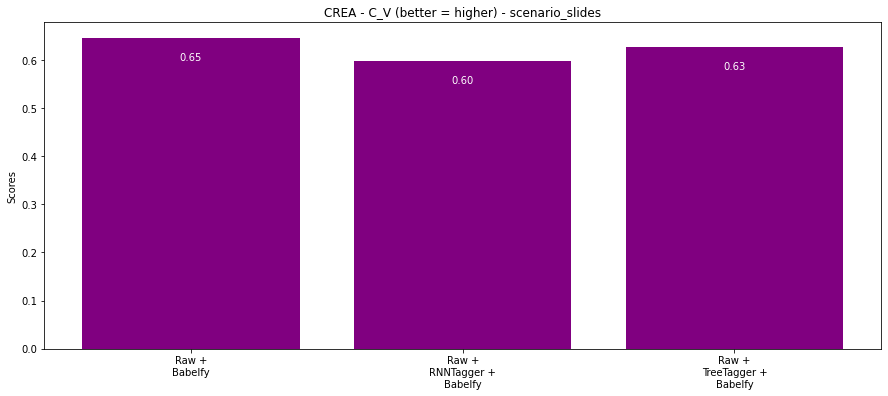

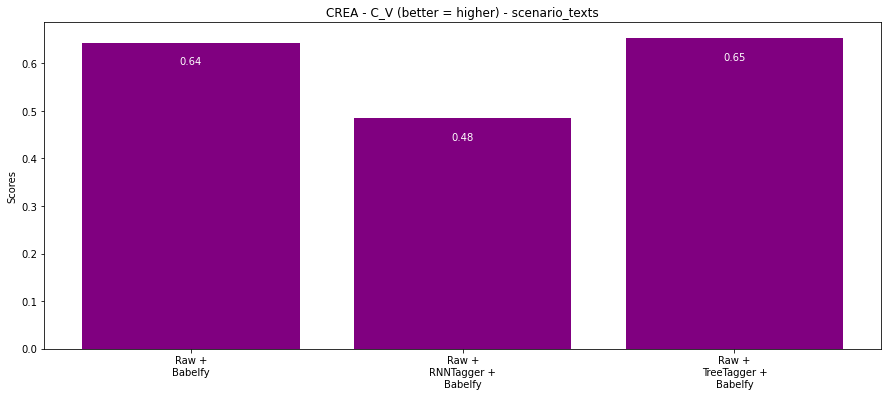

In [12]:
for name, scoresPerMethod in scoresPerScenario:
    CREA = []
    
    for caracs, score in scoresPerMethod:
        if 'u_mass' in caracs:
            continue
        if 'LDA' in caracs:
            continue
        CREA.append((caracs, score))
    
    LABELS = [" +\n".join(labels[:-2]) for labels,_ in CREA]
    CREA = [score for _,score in CREA]

    name = "CREA - C_V (better = higher) - " + name

    visualize(name, CREA, LABELS, "purple")

In [ ]:
for name, scoresPerMethod in scoresPerScenario:
    CREA = []
    
    for caracs, score in scoresPerMethod:
        if 'c_v' in caracs:
            continue
        if 'LDA' in caracs:
            continue
        CREA.append((caracs, score))
    
    LABELS = [" +\n".join(labels[:-2]) for labels,_ in CREA]
    CREA = [score for _,score in CREA]

    name = "CREA - C_UMASS (better = lower) - " + name

    visualize(name, CREA, LABELS, "purple")